# Testing DAG search

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import os
import sympy
import pickle


from DAG_search import utils
from DAG_search import config
from DAG_search import dag_search
from DAG_search import comp_graph

In [397]:
import importlib
importlib.reload(config)
importlib.reload(dag_search)
importlib.reload(comp_graph)
importlib.reload(utils)

<module 'DAG_search.utils' from 'C:\\Users\\Paul Kahlmeyer\\OneDrive\\PhD\\DAG_search\\DAG_search\\utils.py'>

## Experiment: Symbolic Distance vs. Numeric Distance

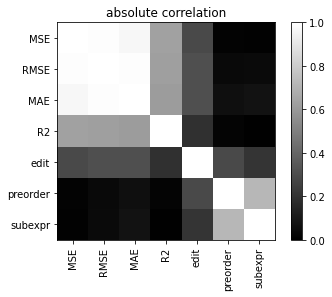

In [405]:
corr_matrix = np.load('results/corr_matrix.npy')
with open(f'results/distance_dict.p', 'rb') as handle:
    dist_dict = pickle.load(handle)
methods = list(dist_dict.keys())


plt.imshow(np.abs(corr_matrix), vmin = 0, vmax = 1, cmap = 'gray')
plt.colorbar()
plt.xticks(range(corr_matrix.shape[0]), methods, rotation = 90)
plt.yticks(range(corr_matrix.shape[0]), methods)
plt.title('absolute correlation')
plt.show()

## Experiment: Recovery

In [362]:
import pickle
ds_name = 'Feynman' # Strogatz, Feynman, Nguyen
mode = 'exhaustive' # exhaustive, sampling

with open(f'results/{ds_name}/{mode}_results.p', 'rb') as handle:
    results_dict = pickle.load(handle)
    
load_path = f'datasets/{ds_name}/tasks.p'
with open(load_path, 'rb') as handle:
    task_dict = pickle.load(handle)

In [363]:
# absolute recovery
total_rec = 0.0
for problem in results_dict:
    rec = results_dict[problem]['recovery']
    print(problem, rec)
    total_rec += np.mean(rec)
total_rec /= len(results_dict)
print(f'Recovery: {total_rec}')

I.10.7 [False]
I.11.19 [False]
I.12.1 [True]
I.12.11 [False]
I.12.2 [True]
I.12.4 [True]
I.12.5 [True]
I.13.12 [False]
I.13.4 [False]
I.14.3 [True]
I.14.4 [True]
I.15.3t [False]
I.15.3x [False]
I.16.6 [False]
I.18.12 [False]
I.18.14 [False]
I.18.4 [False]
I.24.6 [False]
I.25.13 [True]
I.27.6 [True]
I.29.16 [False]
I.29.4 [True]
I.30.3 [False]
I.32.17 [False]
I.32.5 [False]
I.34.1 [True]
I.34.14 [False]
I.34.27 [True]
I.34.8 [True]
I.37.4 [False]
I.38.12 [False]
I.39.1 [True]
I.39.11 [True]
I.39.22 [True]
I.40.1 [False]
I.41.16 [False]
I.43.16 [True]
I.43.31 [True]
I.43.43 [True]
I.44.4 [False]
I.47.23 [True]
I.50.26 [False]
I.6.2 [False]
I.6.2a [True]
I.6.2b [False]
I.8.14 [False]
I.9.18 [False]
II.10.9 [True]
II.11.20 [False]
II.11.27 [False]
II.11.28 [False]
II.11.3 [False]
II.13.17 [False]
II.13.23 [False]
II.13.34 [False]
II.15.4 [True]
II.15.5 [True]
II.2.42 [False]
II.21.32 [False]
II.24.17 [False]
II.27.16 [True]
II.27.18 [True]
II.3.24 [True]
II.34.11 [True]
II.34.2 [True]
II.3

In [356]:
problem = 'I.24.6'

idx = 0
X, y, expr_true = task_dict[problem]['X'], task_dict[problem]['y'], task_dict[problem]['expr']
graph = results_dict[problem]['graphs'][idx]
consts = results_dict[problem]['consts'][idx]

MSE: 4.417842973694348


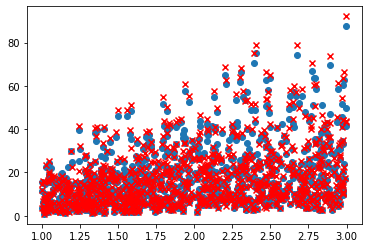

In [334]:
pred = graph.evaluate(X, c = consts)
mse = np.mean((pred[:, 0] - y[:, idx])**2)
print(f'MSE: {mse}')

plt.scatter(X[:, 0], y[:, idx])
plt.scatter(X[:, 0], pred[:, 0], marker = 'x', color = 'red')

In [335]:
graph.evaluate_symbolic()

[c_0*x_0*x_1*x_2*x_3**2]

In [336]:
consts

array([0.53])